<a href="https://colab.research.google.com/github/senurifernando/audioprocessingcovid-19/blob/main/Audioprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving breathing-shallow.wav to breathing-shallow (1).wav


{'breathing-shallow.wav': b'RIFF$ \r\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80\xbb\x00\x00\x00w\x01\x00\x02\x00\x10\x00data\x00 \r\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
!pip install pysoundfile
!pip install bitstring
!pip install noisereduce

In [ ]:
import IPython
IPython.display.Audio('breathing-shallow.wav')

Sampling rate: 48000 samples/second
Sampling size: 430080 samples
Signal duration: 8.960 seconds


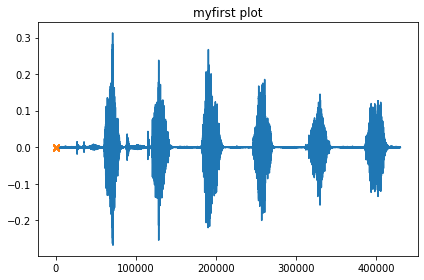

In [ ]:
import soundfile
import matplotlib.pyplot as plt
audio_signal, sampling_rate = soundfile.read('breathing-shallow.wav')
print('Sampling rate: {} samples/second' .format(sampling_rate))
print('Sampling size: {} samples' .format(audio_signal.shape[0]))
print('Signal duration: {:.3f} seconds' .format(audio_signal.shape[0] / sampling_rate))
plt.plot(audio_signal)
plt.tight_layout()
plt.plot(audio_signal[2000:2100], marker='x')
plt.title('myfirst plot')
plt.tight_layout()

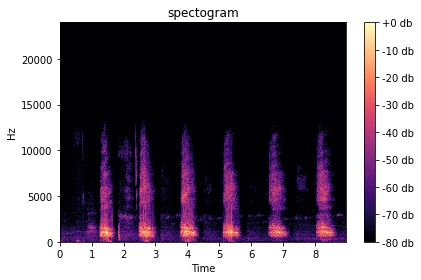

In [ ]:
import librosa
from librosa.display import specshow

import numpy as np
window_length =int(0.025 * sampling_rate)
hop_length =int(0.01 * sampling_rate)

spectogram =np.abs(librosa.stft(audio_signal, hop_length=hop_length, win_length=window_length))

specshow(librosa.amplitude_to_db(spectogram, ref=np.max), sr=sampling_rate, hop_length=hop_length, y_axis='linear', x_axis='time')
plt.title('spectogram')
plt.colorbar(format='%+2.0f db')
plt.tight_layout()

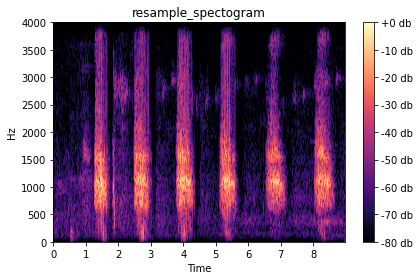

In [ ]:

audio_signal = librosa.resample(audio_signal, sampling_rate, 8000)
sampling_rate=8000

window_length = int(0.025 * sampling_rate)
hop_length = int(0.01 * sampling_rate)

spectogram= np.abs(librosa.stft(audio_signal, hop_length=hop_length, win_length=window_length))
librosa.display.specshow(librosa.amplitude_to_db(spectogram, ref=np.max), sr=sampling_rate, hop_length=hop_length, y_axis='linear', x_axis='time')
plt.title('resample_spectogram')
plt.colorbar(format='%+2.0f db')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


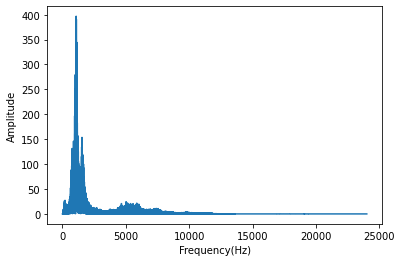

In [ ]:
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack as fftpack

audio_signal, sampling_rate = soundfile.read('breathing-shallow.wav')
FFT=abs(scipy.fft(audio_signal))
freqs=fftpack.fftfreq(len(FFT), (1.0/sampling_rate))

plt.plot(freqs[range(len(FFT)//2)], FFT[range(len(FFT)//2)])
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
import noisereduce as nr 
#load data 
rate, data = wavfile.read("breathing-shallow.wav") 
# select section of data that is noise 
noisy_part = data[10000:15000] 
# perform noise reduction 
reduced_noise = nr.reduced_noise(audio_clip=data,noise_clip=noisy_part, verbose=True) 

AttributeError: ignored